<h1><center> <i>EE2025 Independent Project</i><br/><br/>
<font size="4"><i>Programming Assignment - 1<i></font></center></h1>

In [1]:
# Setting the width of IPython Notebook

from IPython.display import HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### *Importing Libraries*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

### *Binary Image*

Importing Binary Image file

In [3]:
MonaLisa = np.load('binary_image.npy')

Displaying Image

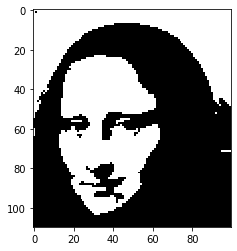

In [4]:
plt.imshow(MonaLisa,'gray')
plt.show()

In [5]:
Digital_Signal = MonaLisa.reshape(1,-1)

### *Setting Modulation Scheme*

Carrier Frequency = 2 MHz
Symbol Duration T = 1μ sec.

$s(t)=x_{2 i-1} \cos \left(2 \pi f_{c} t\right)+x_{2 i} \sin \left(2 \pi f_{c} t\right),$ for $(i-1) T \leq t<i T$

In [34]:
fc = 2 * 1e6
T = 1e-6
samples = 1000

In [46]:
def Analog_Signal_Generator(a,b,i,samples,T,fc):
    # Generates s(t) for the given input of 2 bits
    t = np.linspace((i-1)*T, i*T, samples)
    c = np.cos(2*np.pi*fc*t)
    s = np.sin(2*np.pi*fc*t)
    output = a*c + b*s
    
    return output

In [47]:
def WGN(Variance,samples):
    # Generates White Gaussian Noise
    mu = 0
    sigma = np.sqrt(Variance)
    output = np.random.normal(mu, sigma, samples)
    
    return output

output = WGN(2,1000)

In [48]:
def Analog_Matrix(Digital_Signal,samples,T,fc):
    # Outputs a matrix of all Transmitted Signals
    s = int(Digital_Signal.shape[1]/2)
    output = np.zeros((s,samples))
    
    for i in range(s):
        # output[:,i] = np.transpose
        a = Digital_Signal[0][2*i]
        b = Digital_Signal[0][2*i + 1]
        output[i] = Analog_Signal_Generator(a,b,i+1,samples,T,fc)
        
    return output

Analog_Signal_Matrix = Analog_Matrix(Digital_Signal,samples,T,fc)

In [45]:
Analog_Noise_Signal_Matrix = Analog_Signal_Matrix + WGN(1,samples)

In [56]:
def Energy_Signal_Matrix(signal_matrix):
    
    s = signal_matrix.shape[1]
    
    output = np.multiply(signal_matrix,signal_matrix)
    output = np.sum(output,axis=1)
    output = output/s
    print (output)
    
A = np.array([[1, 2, 3], [3, 4, 5]])
Energy_Signal_Matrix(A)

[[ 1  4  9]
 [ 9 16 25]]
[ 4.66666667 16.66666667]
